# HW02
Deep Learning, AI5302, 2025, Spring, (Tue/Thurs 2:30~3:45)
***

### Problem1. Fully Connected Layer vs Convolution Neural Network
- Build your custom CNN model
- Check the result CNN has better result than FCN
- The test accuracy must bigger than 60%

----

### Problem2. Train Dogs and Cats data via CNN
- Understand the process of training the CNN model with custom dataloader.   
(Download URL: https://www.kaggle.com/c/dogs-vs-cats)
- Check the result
- The test accuracy must bigger than 60%

***
### You can add additional code for checking your image and model.
### You must summit ``.ipynb`` file. Do not summit ``.py`` file.
---

### How to submit your homework
Submit your jupyter notebook file with the filename of  *HW02_studentnumber.ipynb*  on GEL

Ex) HW02_20222015.ipynb  

### Submission deadline
2025.05.08, Sunday 23:59 (PM)

### Plagiarism
We encourage you to discuss this homework with your friends or TA, but you should write your own code.




***
***

## Problem 1. (total 10 pt.)
- **Fully Connected Layer vs Convolution Neural Network**
- We will use cifar10 dataset.
- You have to compare with HW1 result and check CNN model has better result.
- The test accuracy of CNN model must bigger than 60%.   
- Reference : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### Problem 1-1. (2 pt.)
- **Step 1**. Import package.  
- **Step 2**. Define device and configure hyperparameters.  
- **Step 3**. Download then load Cifar10 dataset to dataloader. You have to adjust transform.   

In [ ]:
''' Step 1 '''
import torch
# import ...
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [ ]:
''' Step 2 '''
GPU_NUM = 0
lr = 1e-3
num_classes = 10
batch_size = 512
num_epochs = 100
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')


In [ ]:
''' Step 3 '''

from torchvision import datasets, transforms
import torchvision

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# transforms.RandomCrop(32, padding=4),
#                                 transforms.RandomHorizontalFlip(),

Files already downloaded and verified
Files already downloaded and verified


In [ ]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

### Problem 1-2. (5 pt.)
- **Step 1**. Build your CNN model.  
- **Step 2**. Configure optimizer and objective function.  

In [ ]:
''' Step 1 '''
# you have to change class name!
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.bn1   = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2   = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = CNN()

In [ ]:
''' Step 2 '''
from torch.optim.lr_scheduler import StepLR
model = net.to(device)
optimizer = torch.optim.AdamW(net.parameters(), lr=1e-4, weight_decay=1e-4)
criterion =  nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)

### Problem 1-3. (3 pt.)
- **Step 1**. The method for model training
- **Step 2**. The method for testing model
- **Step 3**. Train the model and check the test results
- **Step 4**. Check the output after training

In [ ]:
''' Step 1 '''


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def train(model, trainloader, optimizer):
    # loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()

    print('Finished Training')

In [ ]:
''' Step 2 '''
def test(model, testloader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in testloader:
            image = image.to(device)
            label = label.to(device)
            output = model(image).to(device)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]

            correct += prediction.eq(label.view_as(prediction)).sum().item()


    test_loss /= (len(testloader.dataset) / batch_size)
    test_accuracy = 100. * correct / len(testloader.dataset)
    return test_loss, test_accuracy

In [ ]:
''' Step 3 '''
net = CNN().to(device)
optimizer = torch.optim.SGD(net.parameters(), lr, momentum=0.9, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)
for epoch in range(1, num_epochs + 1):
    train(net, trainloader, optimizer)
    test_loss, test_accuracy = test(net, testloader)
    scheduler.step()
    print(f"\n[EPOCH: {epoch}/{num_epochs}], \tTest Loss: { test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % lr={scheduler.get_last_lr()[0]:.1e}, \n")

Finished Training

[EPOCH: 1/100], 	Test Loss: 2.3304, 	Test Accuracy: 12.71 % lr=1.0e-03, 

Finished Training

[EPOCH: 2/100], 	Test Loss: 2.2580, 	Test Accuracy: 18.31 % lr=1.0e-03, 

Finished Training

[EPOCH: 3/100], 	Test Loss: 2.1110, 	Test Accuracy: 25.94 % lr=1.0e-03, 

Finished Training

[EPOCH: 4/100], 	Test Loss: 1.9434, 	Test Accuracy: 31.51 % lr=1.0e-03, 

Finished Training

[EPOCH: 5/100], 	Test Loss: 1.8300, 	Test Accuracy: 35.03 % lr=1.0e-03, 

Finished Training

[EPOCH: 6/100], 	Test Loss: 1.7485, 	Test Accuracy: 38.07 % lr=1.0e-03, 

Finished Training

[EPOCH: 7/100], 	Test Loss: 1.6842, 	Test Accuracy: 40.40 % lr=1.0e-03, 

Finished Training

[EPOCH: 8/100], 	Test Loss: 1.6304, 	Test Accuracy: 41.88 % lr=1.0e-03, 

Finished Training

[EPOCH: 9/100], 	Test Loss: 1.5884, 	Test Accuracy: 43.65 % lr=1.0e-03, 

Finished Training

[EPOCH: 10/100], 	Test Loss: 1.5412, 	Test Accuracy: 45.32 % lr=1.0e-03, 

Finished Training

[EPOCH: 11/100], 	Test Loss: 1.5176, 	Test Accurac

In [ ]:
''' Step 4 '''
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 68.4 %
Accuracy for class: car   is 80.5 %
Accuracy for class: bird  is 58.8 %
Accuracy for class: cat   is 42.9 %
Accuracy for class: deer  is 52.3 %
Accuracy for class: dog   is 54.0 %
Accuracy for class: frog  is 71.4 %
Accuracy for class: horse is 64.6 %
Accuracy for class: ship  is 73.7 %
Accuracy for class: truck is 78.0 %


---
---

## Problem 2. (Total 10 pt.)
- **Train Dogs and Cats data via CNN**
- **You must set the class that Dogs are 0 and Cats are 1.**
- Understand the process of training the CNN model with custom dataloader.
- Download the dataset from below.   
https://www.kaggle.com/c/dogs-vs-cats
- The test accuracy of CNN model must bigger than 60%.   

### Problem 2-1. (4 pt.)
- **Step 1**. Import package.  
- **Step 2**. Define device and configure hyperparameters.  
- **Step 3**. Load **Dogs and Cats** dataset to dataloader. You have to adjust transform.  
**You can label dataset via images name at train folder.**

In [1]:
''' Step 1 '''
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import os
from PIL import Image
import torch.nn.functional as F

In [3]:
''' Step 2 '''
GPU_NUM = 0
lr = 1e-3
num_classes = 2
batch_size = 256
num_epochs = 12
device = torch.device(f'cuda:{GPU_NUM}' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [6]:
from PIL import Image
''' Step 3 '''
IMG_SIZE = 128

transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])


class DogCatData(Dataset):
    def __init__(self, img_dir, IMG_SIZE = 32, transform = None):
        self.img_dir = img_dir
        self.file_names = sorted(os.listdir(img_dir))
        self.transform = transform
    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        img_path = os.path.join(self.img_dir, file_name)
        img = Image.open(img_path).convert('RGB')

        # 1 = dog, 0 = cat
        label = 0 if file_name.startswith("cat") else 1

        transformed_img = self.transform(img)

        return transformed_img, label

    def __len__(self):
        return len(self.file_names)

working_dir = "/root/deeplearningHW/dogs-vs-cats/train"

train_data = DogCatData(working_dir, IMG_SIZE, transform)
train_loader = DataLoader(train_data, shuffle = True, batch_size = 4)

val_dir = "/root/deeplearningHW/dogs-vs-cats/test1"
val_data = DogCatData(val_dir, IMG_SIZE, transform)
val_loader = DataLoader(val_data, shuffle = True, batch_size = 4)


### Problem 2-2. (3 pt.)
- **Step 1**. Build your CNN model.  
(It doesn't matter if you use same model at problem 1.)
- **Step 2**. Configure optimizer and objective function.

In [7]:
''' Step 1 '''

class CNN_dogs_cats(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5, padding=2)
        self.bn1   = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn2   = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 30 * 30, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)


    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
dcnet = CNN_dogs_cats()

In [8]:
''' Step 2 '''
from torch.optim.lr_scheduler import StepLR
optimizer = torch.optim.AdamW(dcnet.parameters(), lr=1e-3, weight_decay=1e-3)
criterion =  nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)

### Problem 2-3. (3 pt.)
- **Step 1**. The method for model training
- **Step 2**. The method for validation model
- **Step 3**. Train the model and check the validation results
- **Step 4**. Check the test result by **ten** samples with image

In [9]:
''' Step 1 '''
def traindc(model, train_loader, optimizer, criterion):
    # loop over the dataset multiple times
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader.dataset)
    print('Finished Training')
    return epoch_loss

In [10]:
''' Step 2 '''
def validate(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
    epoch_loss = running_loss / len(dataloader.dataset)
    epoch_acc  = correct / len(dataloader.dataset)
    return epoch_loss, epoch_acc

In [11]:
import tqdm

In [12]:
''' Step 3 '''
num_epochs = 6
torch.cuda.empty_cache()
model = dcnet.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import CosineAnnealingLR

scheduler = CosineAnnealingLR(optimizer, T_max=12)

for epoch in tqdm.tqdm(range(1, num_epochs+1), leave=False, desc="Training Epochs"):
    train_loss = traindc(model, train_loader, optimizer, criterion)
    val_loss, val_acc = validate(model, val_loader, criterion)
    scheduler.step()

    print(f"[Epoch {epoch}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}  "
          f"Val Loss: {val_loss:.4f}  "
          f"Val Acc: {val_acc*100:.2f}%"
          f" lr={scheduler.get_last_lr()[0]:.1e}")

Training Epochs:   0%|          | 0/6 [00:00<?, ?it/s]

Finished Training


Training Epochs:  17%|█▋        | 1/6 [08:27<42:17, 507.57s/it]

[Epoch 1/6] Train Loss: 0.1576  Val Loss: 0.7122  Val Acc: 50.40% lr=9.8e-04
Finished Training


Training Epochs:  33%|███▎      | 2/6 [16:38<33:10, 497.69s/it]

[Epoch 2/6] Train Loss: 0.1318  Val Loss: 0.8016  Val Acc: 53.40% lr=9.3e-04
Finished Training


Training Epochs:  50%|█████     | 3/6 [24:27<24:14, 484.73s/it]

[Epoch 3/6] Train Loss: 0.1168  Val Loss: 0.9441  Val Acc: 51.98% lr=8.5e-04
Finished Training


Training Epochs:  67%|██████▋   | 4/6 [32:21<16:00, 480.43s/it]

[Epoch 4/6] Train Loss: 0.1063  Val Loss: 1.1471  Val Acc: 48.85% lr=7.5e-04
Finished Training


Training Epochs:  83%|████████▎ | 5/6 [40:24<08:01, 481.37s/it]

[Epoch 5/6] Train Loss: 0.0966  Val Loss: 1.0801  Val Acc: 49.88% lr=6.3e-04
Finished Training


[Epoch 6/6] Train Loss: 0.0870  Val Loss: 1.3236  Val Acc: 46.87% lr=5.0e-04


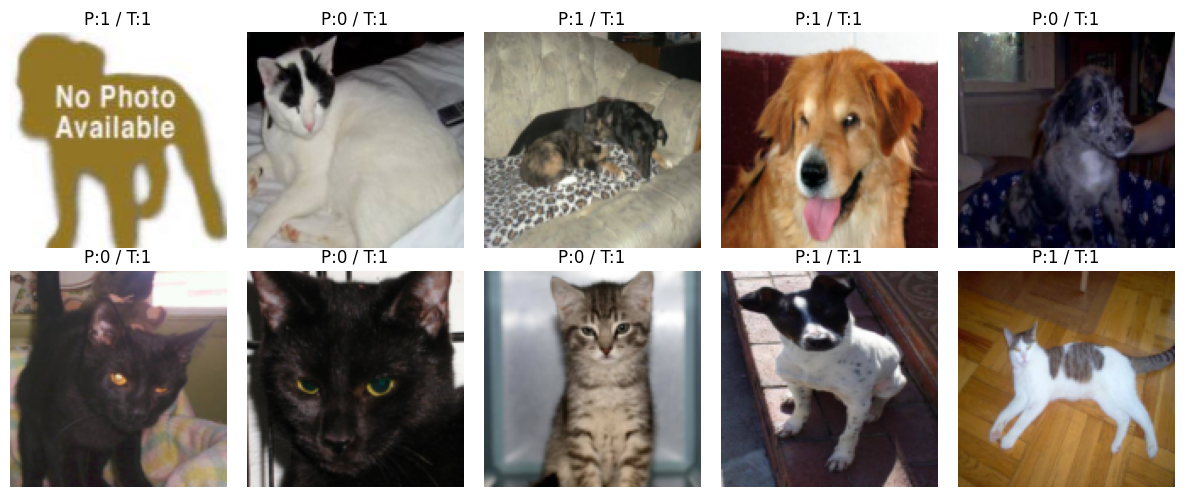

In [18]:
import matplotlib.pyplot as plt

''' Step 4 '''
inv_norm = transforms.Normalize(
    mean=[-m/s for m, s in zip([0.485,0.456,0.406],[0.229,0.224,0.225])],
    std=[1/s for s in [0.229,0.224,0.225]]
)

model.eval()
fig = plt.figure(figsize=(12,5))
count = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(dim=1)
        for i in range(inputs.size(0)):
            if count >= 10: break
            ax = fig.add_subplot(2, 5, count+1)
            img = inv_norm(inputs[i]).cpu().permute(1,2,0).numpy()
            ax.imshow(np.clip(img, 0, 1))
            ax.set_title(f"P:{preds[i].item()} / T:{labels[i].item()}")
            ax.axis('off')
            count += 1
        if count >= 10: break

plt.tight_layout()
plt.show()